In [1]:
import pymongo
from pymongo import MongoClient
import pprint
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import numpy as np
from sentiment_module import sentiment
from sklearn.linear_model import LogisticRegression

In [142]:
# reading Mongo result into pandas
client = MongoClient()
db = client.Yelp
df=pd.DataFrame(list(db.review.find().limit(10000)))

In [145]:
df['sentiment']=df['text'].apply(str.split).apply(sentiment.sentiment)

In [146]:
df=pd.concat([df['sentiment'].apply(pd.Series),df.drop('sentiment',axis=1)],axis=1)

In [147]:
df.head()

,valence,arousal,_id,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,7.185806,4.702425,5bb546f235e9995049a63b77,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
1,6.445321,4.173146,5bb546f235e9995049a63b78,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
2,5.738828,4.506877,5bb546f235e9995049a63b79,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
3,5.397307,4.449776,5bb546f235e9995049a63b7a,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
4,6.525649,4.731848,5bb546f235e9995049a63b7b,yFumR3CWzpfvTH2FCthvVw,0,2016-06-15,0,STiFMww2z31siPY7BWNC2g,5,I have been an Emerald Club member for a numbe...,0,TlvV-xJhmh7LCwJYXkV-cg


In [148]:
df=df.drop(df[df['valence']==0].index)

In [149]:
df[df['valence']==0]

,valence,arousal,_id,business_id,cool,date,funny,review_id,stars,text,useful,user_id


In [150]:
df[df['arousal']==0]

,valence,arousal,_id,business_id,cool,date,funny,review_id,stars,text,useful,user_id


In [152]:
%matplotlib inline

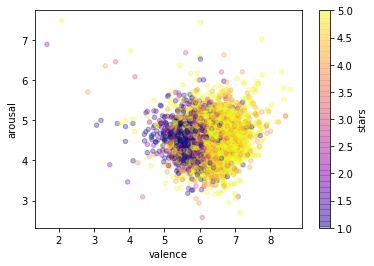

In [175]:
fig, ax = plt.subplots()
df.plot.scatter(x='valence',y='arousal',c='stars',
               colormap='plasma',ax=ax, alpha=0.3)
plt.show()

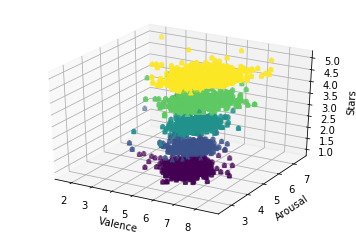

In [163]:
from mpl_toolkits.mplot3d import Axes3D

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = df['valence']
    ys = df['arousal']
    zs = df['stars']
    ax.scatter(xs, ys, zs, c=df['stars'], marker=m)

ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Stars')

plt.show()

In [173]:
df.to_csv('sentiment.csv')